# Unsupervised Learning: Dimensionality Reduction and Latent Variable Modelling

### by Neil Lawrence (2015)

So far in our classes we have focussed mainly on regression problems, which are examples of supervised learning. We have considered the relationship between the likelihood and the objective function and we have shown how we can find paramters by maximizing the likelihood (equivalent to minimizing the objective function) and in the last session we saw how we can *marginalize* the parameters in a process known as Bayesian inference.

Now we are going to turn to a different form of learning, commonly known as *unsupervised* learning. In unsupervised learning our data isn't necessarily labelled in any form, but we want models that give us a better understanding of the data. We've actually seen an example of this already with *matrix factorization* for collaborative filtering,  which we introduces in the context of *objective functions*. Now we will introduce a more probabilistic approach to such models, specifically we are interested in *latent variable* modelling.

## Latent Variables

Latent means hidden, and hidden variables are simply *unobservable* variables. The idea of a latent variable is crucial to the concept of artificial intelligence, machine learning and experimental design. A latent variable could take many forms. We might observe a man walking along a road with a large bag of clothes and we might *infer* that the man is walking to the laundrette. Our observations are a highly complex data space, the response in our eyes is processed through our visual cortex, the combination of the indidivuals limb movememnts and the direction they are walking in all conflate in our heads to cause us to infer that (perhaps) the individual is going to the laundrette. We don't *know* that the man is walking to the laundrette, but we have a model of the world that suggests that it's a likely outcome for the very complex data. In some ways the latent variable can be seen as a *compression* of this very complex scene. If I were writing a book, I might write that "A man tripped over whilst walking to the laundrette". In the reader's mind an image of a man, perhaps laden with dirty clothes, may occur. All these ideas come from our expectations of the world around us. We can make further inference about the man, some of it perhaps plausible others less so. The man may be going to the laundrette because his washing machine is broken, or because he doesn't have a large enough flat to have a washing machine, or because he's carrying a duvet, or because he doesn't like ironing. All of these may *increase* in probability given our observation, but they are still *latent* variables. Unless we follow the man back to his appartment, or start making other enquirires about the man, we don't know the true answer. 

It's clear that to do inference about any complex system we *must* include latent variables. Latent variables are extremely powerful. In robotics, they are used to represent the *state* of the robot. The state of the robot may include its position (in x, y coordinates) its speed, its direction of facing. How are *these* variables unknown to the robot? Well the robot only posesses *sensors*, it can make observations of the nearest object in a certain direction, and it may have a map of its environment. If we represent the state of the robot as its position on a map, it may be uncertain of that position. If you go walking or running in the hills around Sheffield, you can take a very high quality ordnance survey map with you. However, unless you are a really excellent orienteer, when you are far from any given landmark, you will probably be *uncertain* about your true position on the map. These states are also latent variables. 

In statistical analysis of experiments you try to control for each aspect of the experiment, in particular by *randomization*. So if I'm interested in the ability of a particular fertilizer to improve the yield of a particular plant I may design an experiment where I apply the fertilizer to some plants (the treatment group) and withold the fertilizer from others (the control group). I then test to see whether the yield from the treatment group is better (or worse) than the control group. I may find that I have an excellent yield for the treatment group. However, what if I'd (unknowlingly) planted all my treatment plants in a sunny part of the field, and all the control plants in a shady part of the field. That would also be a latent variable, in this case known as a *confounder*. In statistical experimental design *randomization* is used to attempt to eliminate the correlated effects of these confounders: you aim to ensure that if these confounders *do* exist their effects are not correlated with treatment and contorl. This is known as a [randomized control trial](http://en.wikipedia.org/wiki/Randomized_controlled_trial). 

Greek philosophers worried a great deal about what was knowable and what was unknowable. Adherents of [philosophical Skeptisism](http://en.wikipedia.org/wiki/Skepticism) were inspired by the idea that since your senses sometimes give you contradictory information, they cannot be trusted, and in extreme cases they chose to *ignore* their senses. This is an acknowledgement that very often the true state of the world cannot be known with precision. Unfortunately, these philosophers didn't have a good understanding of probability, so they were unable to encapsulate their ideas through a *degree* of belief.

We often use language to express the compression of a complex behavior or patterns in a simpler way, for example we talk about motives as a useful distallation for a perhaps very complex patter of behavior. In physics we use principles of causation and simple laws to describe the world around us. Such motives or underlying principles are difficult to observe directly, our conclusions about them emerge over a period of time by observing indirect consequences of the latent variables.

Epistemic uncertainty allows us to deal with these worries by associating our degree of belief about the state of the world with a probaiblity distribution. This core idea underpins state space modelling, probabilistic graphical models and the wider field of latent variable modelling. In this session we are going to explore the idea in a simple linear system and see how it relates to *factor analysis* and *principal component analysis*.

## Your Personality

At the beginning of the 20th century there was a great deal of interest amoungst psychologists in formalizing patterns of thought. The approach they used became known as factor analysis. The principle is that we observe a potentially high dimensional vector of characteristics about an individual. To formalize this, social scientists designed questionaires. We can envisage many questions that we may ask, but the assumption is that underlying these questions there are only a few traits that dictate the behavior. These models are known as latent trait models and the analysis is sometimes known as factor analysis. The idea is that there are a few characteristic traits that we are looking to discern. These traits or factors can be extracted by assimilating the high dimensional characteristics of the individual into a few latent factors. 

### Factor Analysis Model

This causes us to consider a model as follows, if we are given a high dimensional vector of features (perhaps questionaire answers) associated with an individual, $\mathbf{y}$, we assume that these factors are actually generated from a low dimensional vector latent traits, or latent variables, which determine the personality.
$$
\mathbf{y} = \mathbf{f}(\mathbf{x}) + \boldsymbol{\epsilon}
$$
where $\mathbf{f}(\mathbf{x})$ is a *vector valued* function that is dependent on the latent traits and $\boldsymbol{\epsilon}$ is some corrupting noise. For simplicity, we assume that the function is given by a *linear* relationship,
$$
\mathbf{f}(\mathbf{x}) = \mathbf{W}\mathbf{x}
$$
where we have introduced a matrix $\mathbf{W}$ that is sometimes referred to as the *factor loadings* but we also immediately see is related to our *multivariate linear regression* models from the previous session on linear regression. That is because our vector valued function is of the form
$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_p(\mathbf{x})\end{bmatrix}
$$
where there are $p$ features associated with the individual. If we consider any of these functions individually we have a prediction function that looks like a regression model,
$$
f_j(\mathbf{x}) = \mathbf{w}_{j, :}^\top \mathbf{x},
$$
for each element of the vector valued function, where $\mathbf{w}_{:, j}$ is the $j$th column of the matrix $\mathbf{W}$. In that context each column of $\mathbf{W}$ is a vector of *regression weights*. This is a multiple input and multiple output regression. Our inputs (or covariates) have dimensionality greater than 1 and our outputs (or response variables) also have dimensionality greater than one. Just as in a standard regression, we are assuming that we don't observe the function directly (note that this *also* makes the function a *type* of latent variable), but we observe some corrupted variant of the function, where the corruption is given by $\boldsymbol{\epsilon}$. Just as in linear regression we can assume that this corruption is given by Gaussian noise, where the noise for the $j$th element of $\mathbf{y}$ is by,
$$
\epsilon_j \sim \mathcal{N}(0, \sigma^2_j).
$$
Of course, just as in a regression problem we also need to make an assumption across the individual data points to form our full likelihood. Our data set now consists of many observations of $\mathbf{y}$ for diffetent individuals. We store these observations in a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$ contains the observation for one individual. To emphasize that $\mathbf{y}$ is a vector derived from a row of $\mathbf{Y}$ we represent the observation of the features associated with the $i$th individual by $\mathbf{y}_{i, :}$, and place each individual in our data matrix,
$$
\mathbf{Y} = \begin{bmatrix} \mathbf{y}_{1, :}^\top \\ \mathbf{y}_{2, :}^\top \\ \vdots \\ \mathbf{y}_{n, :}^\top\end{bmatrix},
$$
where we have $n$ data points. Our data matrix therefore has $n$ rows and $p$ columns. The point to notice here is that each data obsesrvation appears as a row vector in the design matrix (thus the transpose operation inside the brackets). Our prediction functions are now actually a *matrix value* function, 
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top,
$$
where for each matrix the data points are in the rows and the data features are in the columns. This implies that if we have $q$ inputs to the function we have $\mathbf{F}\in \Re^{n\times p}$, $\mathbf{W} \in \Re^{p \times q}$ and $\mathbf{X} \in \Re^{n\times q}$.

### Assignment Question 1

Show that, given all the definitions above, if,
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top
$$
and the elements of the vector valued function $\mathbf{F}$ are given by 
$$
f_{i, j} = f_j(\mathbf{x}_{i, :}),
$$
where $\mathbf{x}_{i, :}$ is the $i$th row of the latent variables, $\mathbf{X}$, then show that
$$
f_j(\mathbf{x}_{i, :}) = \mathbf{w}_{j, :}^\top \mathbf{x}_{i, :}
$$

*5 marks*

#### Question 1 Answer

Given that $\mathbf{F} = \mathbf{X}\mathbf{W}^\top$, the elements of the vector valued function can be represented as $ f_{i, j} = f_j(\mathbf{x}_{i, :})$ where $\mathbf{x}_{i, :}$ is the $i$th row of the matrix $\mathbf{X}$ that contains the latent variables. 

Given that $\mathbf{f}(\mathbf{x})$ is a *vector valued* function we can represent it as 

$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_p(\mathbf{x})\end{bmatrix}
$$

where there are $\mathit{p}$ features associated with the individual. 
Considering these functions individually then the prediction function becomes
$$
f_j(\mathbf{x}) = \mathbf{w}_{j, :}^\top \mathbf{x},
$$
for each element of the vector valued function, where $\mathbf{w}_{:, j}$ is the $j$th column of the matrix $\mathbf{W}$.

Then given a row  $\mathit{x}_{i, :}$ of the matrix $\mathbf{X}$, 
we end up with 

$$
f_j(\mathbf{x}_{i, :}) = \mathbf{w}_{j, :}^\top \mathbf{x}_{i, :}
$$





## Latent Variables

The difference between this model and a multiple output regression is that in the regression case we are provided with the covariates $\mathbf{X}$, here they are *latent variables*. These variables are unknown. 

Just as we have done in the past for unknowns, we now treat them with a probability distribution. In *factor analysis* we assume that the latent variables have a Gaussian density which is independent across both across the latent variables associated with the different data points, and across those associated with different data features, so we have,
$$
x_{i,j} \sim \mathcal{N}(0, 1),
$$
and we can write the density governing the latent variable associated with a single point as,
$$
\mathbf{x}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}).
$$
If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} = \mathbf{f}(\mathbf{x}_{i, :}) = \mathbf{W}\mathbf{x}_{i, :} 
$$
then we can use the rules for multivariate Gaussian relationships to write that
$$
\mathbf{f}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top)
$$
which implies that the distribution for $\mathbf{y}_{i, :}$ is given by
$$
\mathbf{y}_{i, :} = \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma})
$$
where $\boldsymbol{\Sigma}$ the covariance of the noise variable, $\epsilon_{i, :}$ which for factor analysis is a diagonal matrix (because we have assumed that the noise was *independent* across the features),
$$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
                                     0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots & 0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$
For completeness, we could also add in a *mean* for the data vector $\boldsymbol{\mu}$, 
$$
\mathbf{y}_{i, :} = \mathbf{W} \mathbf{x}_{i, :} + \boldsymbol{\mu} + \boldsymbol{\epsilon}_{i, :}
$$
which would give our marginal distribution for $\mathbf{y}_{i, :}$ a mean $\boldsymbol{\mu}$. However, the maximum likelihood solution for $\boldsymbol{\mu}$ turns out to equal the empirical mean of the data,
$$
\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^n \mathbf{y}_{i, :},
$$
*regardless* of the form of the covariance, $\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a result it is very common to simply preprocess the data and ensure it is zero mean. We will follow that convention for this session.

The prior density over latent variables is independent, and the likelihood is independent, that means that the marginal likelihood here is also independent over the data points. 
                                     
Factor analysis was developed mainly in psychology and the social sciences for understanding personality and intelligence. [Charles Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned with the measurements of "the abilities of man" and is credited with the earliest version of factor analysis.                                    
                                   
## Principal Component Analysis

In 1933 [Harold Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on *principal component analysis* the first mention of this approach. Hotelling's inspiration was to provide mathematical foundation for factor analysis methods that were by then widely used within psychology and the social sciences. His model was a factor analysis model, but he considered the noiseless 'limit' of the model. In other words he took $\sigma^2_i \rightarrow 0$ so that he had
$$
\mathbf{y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}).
$$
The paper had two unfortunate effects. Firstly, the resulting model is no longer valid probablistically, because the covariance of this Gaussian is 'degenerate'. Because $\mathbf{W}\mathbf{W}^\top$ has rank of at most $q$ where $q<p$ (due to the dimensionality reduction) the determinant of the covariance is zero, meaning the inverse doesn't exist so the density,
$$
p(\mathbf{y}_{i, :}|\mathbf{W}) = \lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2} |\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|^{-1}} \exp\left(-\frac{1}{2}\mathbf{y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2 \mathbf{I}\right]^{-1}\mathbf{y}_{i, :}\right),
$$
is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$). This mathematical consequence is a probability density which has no 'support' in large regions of the space for $\mathbf{y}_{i, :}$. There are regions for which the probability of $\mathbf{y}_{i, :}$ is zero. These are any regions that lie off the hyperplane defined by mapping from $\mathbf{x}$ to $\mathbf{y}$ with the matrix $\mathbf{W}$. In factor analysis the noise corruption, $\boldsymbol{\epsilon}$, allows for points to be found away from the hyperplane. In Hotelling's PCA the noise variance is zero, so there is only support for points that fall precisely on the hyperplane. Secondly, Hotelling explicity chose to rename factor analysis as principal component analysis, arguing that the factors social scientist sought were different in nature to the concept of a mathematical factor. This was unfortunate because the factor loadings, $\mathbf{W}$ can also be seen as factors in the mathematical sense because the model Hotelling defined is a Gaussian model with covariance given by $\mathbf{C} = \mathbf{W}\mathbf{W}^\top$ so $\mathbf{W}$ is a *factor* of the covariance in the mathematical sense, as well as a factor loading. 

However, the paper had one great advantage over standard approaches to factor analysis. Despite the fact that the model was a special case that is subsumed by the more general approach of factor analysis it is this special case that leads to a particular algorithm, namely that the factor loadings (or principal components as Hotelling referred to them) are given by an *eigenvalue decomposition* of the empirical covariance matrix.

## Eigenvalue Decomposition

Eigenvalue problems are widespreads in physics and mathematics, they are often written as a matrix/vector equation but we prefer to write them as a full matrix equation. In an eigenvalue problem you are looking to find a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}.
$$
where $\mathbf{A}$ is your matrix of interest. This equation is not trivially solvable through matrix inverse because matrix multiplication is not [commutative](http://en.wikipedia.org/wiki/Commutative_property), so premultiplying by $\mathbf{U}^{-1}$ gives
$$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U} = \boldsymbol{\Lambda}, 
$$
where we remember that $\boldsymbol{\Lambda}$ is a *diagonal* matrix, so the eigenvectors can be used to *diagonalise* the matrix. When performing the eigendecomposition on a Gaussian covariances, diagonalisation is very important because it returns the covariance to a form where there is no correlation between points. 

### Positive Definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix, which implies it is *positive definite*. A positive definite matrix is one for which the inner product,
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}
$$
is positive for *all* values of the vector $\mathbf{w}$ other than the zero vector. One way of creating a positive definite matrix is to assume that the symmetric and positive definite matrix $\mathbf{C}\in \Re^{p\times p}$ is factorised into, $\mathbf{A}in \Re^{p\times p}$, a *full rank* matrix, so that
$$
\mathbf{C} = \mathbf{A}^\top \mathbf{A}.
$$
This ensures that $\mathbf{C}$ must be positive definite because
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}=\mathbf{w}^\top \mathbf{A}^\top\mathbf{A}\mathbf{w} 
$$
and if we now define a new *vector* $\mathbf{b}$ as
$$
\mathbf{b} = \mathbf{A}\mathbf{w}
$$
we can now rewrite as
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w} = \mathbf{b}^\top\mathbf{b} = \sum_{i} b_i^2
$$
which, since it is a sum of squares, is positive or zero. The constraint that $\mathbf{A}$ must be *full rank* ensures that there is no vector $\mathbf{w}$, other than the zero vector, which causes the vector $\mathbf{b}$ to be all zeros. 



### Assignment Question 2

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the value of the element at the $i$th row and the $j$th column of $\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show that (i) the matrix is symmetric and (ii) the matrix has positive elements along its diagonal.

*5 marks*

#### Question 2 Answer

Let $\textbf{a}_{:,j}$ be the vector that contains the $j$th column of $\mathbf{A}$. 

Then, $c_{i,j} = \mathbf{a}_{:, i} ^\top \mathbf{a}_{:,j}$

$$ \\ \\ \\ $$
$\textbf{Need to prove that the matrix is symmetric:}$

A matrix $\mathbf{C}$ is symmetric if it is a square matrix and it satisfies the following property:

$$ \mathbf{C ^ \top = C} $$

We know that $\mathbf{C}\in \Re^{p\times p}$ and $\mathbf{A}\in \Re^{p\times p}$.
Hence, we already know that $\mathbf{C}$ is a square matrix (i.e. it has equal number of columns and rows). 
Now we need to prove that $ \mathbf{C ^ \top = C} $.

if $ \mathbf{C ^ \top = C}$, then $c_{i, j} = c_{j, i}$ (i.e. the $i$th row of $\textbf{C}$ becomes the $i$th column of $\mathbf{C^\top}$).

We know that $ c_{i, j} = \mathbf{a}_{:, i} ^\top \mathbf{a}_{:,j}$ where $\mathbf{a}_{:, i}$ and $\mathbf{a}_{:, j}$
are vectors of size $1 \times p$ (given that $\mathbf{A}\in \Re^{p\times p}$) which represent $i$th and $j$th columns of $\mathbf{A}$.

Hence, 
$$
c_{j, i} = \mathbf{a}_{:, j} ^\top \mathbf{a}_{:,i} 
= \mathbf{a}_{:, i} ^\top \mathbf{a}_{:,j}
= c_{i, j}
$$

hence, $\mathbf{C ^ \top = C}$ (i.e. $\mathbf{C}$ is symmetric). 

$$ \\ \\ \\ $$ 
$\textbf{Need to prove that the matrix has positive elements along its diagonal:}$

Given that $\mathbf{C}\in \Re^{p\times p}$ we know that elements along the diagonal of the matrix are represented as $c_{1, 1}$, $c_{2, 2}$, .., $c_{p, p}$. This implies that an element of a diagonal is given by $c_{i, j}$ where $i = j$. We already know that $c_{i,j} = \mathbf{a}_{:, i} ^\top \mathbf{a}_{:,j}$. Given that $i = j$, we can represent $c_{i,j}$ as:

$$c_{i, i} = \mathbf{a}_{:, i} ^\top \mathbf{a}_{:, i}
$$
and if we now define a new vector $\mathbf{b}$ as
$$ \mathbf{b} = \mathbf{a}_{:, i} $$

we can now rewrite as
$$
c_{i, i} = \mathbf{b^\top b} = \sum_{z = 1} ^ p b_{z} ^ 2
$$

Since it is a sum of squares, we know that each element along the diagonal of the matrix $\textbf{C}$ is positive.

## Eigenvectors of a Symmetric Matric

Symmetric matrices have *orthonormal* eigenvectors. This means that $\mathbf{U}$ is an [orthogonal matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix), $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that $\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$ and 1 if $i=j$. 

## Probabilistic PCA

In 1997 [Tipping and Bishop](http://research.microsoft.com/pubs/67218/bishop-ppca-jrss.pdf)  and [Roweis](https://www.cs.nyu.edu/~roweis/papers/empca.pdf) independently revisited Hotelling's model and considered the case where the noise variance was finite, but *shared* across all output dimensons. Their model can be thought of as a factor analysis where
$$
\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}.
$$
This leads to a marginal likelihood of the form
$$
p(\mathbf{Y}|\mathbf{W}, \sigma^2) = \prod_{i=1}^n\mathcal{N}(\mathbf{y}_{i, :} | \mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I})
$$
where the limit of $\sigma^2\rightarrow 0$ is *not* taken. This defines a proper probabilistic model. Tippping and Bishop then went on to prove that the *maximum likelihood* solution of this model with respect to $\mathbf{W}$ is given by an eigenvalue problem. In the probabilistic PCA case the eigenvalues and eigenvectors are given as follows. 
$$
\mathbf{W} = \mathbf{U}\mathbf{L} \mathbf{R}^\top
$$
where $\mathbf{U}$ is the eigenvectors of the empirical covariance matrix 
$$
\mathbf{S} = \sum_{i=1}^n (\mathbf{y}_{i, :} - \boldsymbol{\mu})(\mathbf{y}_{i, :} - \boldsymbol{\mu})^\top,
$$ 
which can be written $\mathbf{S} = \frac{1}{n} \mathbf{Y}^\top\mathbf{Y}$ if the data is zero mean. The matrix $\mathbf{L}$ is diagonal and is dependent on the *eigenvalues* of $\mathbf{S}$, $\boldsymbol{\Lambda}$. If the $i$th diagonal element of this matrix is given by $\lambda_i$ then the corresponding element of $\mathbf{L}$ is 
$$
\ell_i = \sqrt{\lambda_i - \sigma^2}
$$
where $\sigma^2$ is the noise variance. Note that if $\sigma^2$ is larger than any particular eigenvalue, then that eigenvalue (along with its corresponding eigenvector) is *discarded* from the solution. 

### Python Implementation of Probabilistic PCA

We will now implement this algorithm in python. 

In [55]:
# probabilistic PCA algorithm
def ppca(Y, q):
    # remove mean
    Y_cent = Y - Y.mean(0)
    import numpy as np

    # Comute covariance
    S = np.dot(Y_cent.T, Y_cent)/Y.shape[0]
    lambd, U = np.linalg.eig(S)

    # Choose number of eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    l = np.sqrt(lambd[:q]-sigma2)
    W = U[:, :q]*l[None, :]
    return W, sigma2

In practice we may not wish to compute the eigenvectors of the covariance matrix directly. This is because it requires us to estimate the covariance, which involves a sum of squares term, before estimating the eigenvectors. We can estimate the eigenvectors directly either through [QR decomposition](http://en.wikipedia.org/wiki/QR_decomposition) or [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition). We saw a similar issue arise when computing the weights in a regression problem, where we also wished to avoid computation of $\mathbf{X}^\top\mathbf{X}$ (or in the case of nonlinear regression with basis functions $\boldsymbol{\Phi}^\top\boldsymbol{\Phi}$). 

## Posterior for Principal Component Analysis

Under the latent variable model justification for principal component analysis, we are normally interested in inferring something about the latent variables given the data. This is the distribution,
$$
p(\mathbf{x}_{i, :} | \mathbf{y}_{i, :})
$$
for any given data point. Determining this density turns out to be very similar to the approach for determining the Bayesian posterior of $\mathbf{w}$ in Bayesian linear regression, only this time we place the prior density over $\mathbf{x}_{i, :}$ instead of $\mathbf{w}$. The posterior is proportional to the joint density as follows,
$$
p(\mathbf{x}_{i, :} | \mathbf{y}_{i, :}) \propto p(\mathbf{y}_{i, :}|\mathbf{W}, \mathbf{x}_{i, :}, \sigma^2) p(\mathbf{x}_{i, :})
$$
And as in the Bayesian linear regression case we first consider the log posterior,
$$
\log p(\mathbf{x}_{i, :} | \mathbf{y}_{i, :}) = \log p(\mathbf{y}_{i, :}|\mathbf{W}, \mathbf{x}_{i, :}, \sigma^2) + \log p(\mathbf{x}_{i, :}) + \text{const}
$$
where the constant is not dependent on $\mathbf{x}$. As before we collect the quadratic terms in $\mathbf{x}_{i, :}$ and we assemble them into a Gaussian density over $\mathbf{x}$.
$$
\log p(\mathbf{x}_{i, :} | \mathbf{y}_{i, :}) = -\frac{1}{2\sigma^2} (\mathbf{y}_{i, :} - \mathbf{W}\mathbf{x}_{i, :})^\top(\mathbf{y}_{i, :} - \mathbf{W}\mathbf{x}_{i, :}) - \frac{1}{2} \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} + \text{const}
$$


### Assignment Question 3

Multiply out the terms in the brackets. Then collect the quadratic term and the linear terms together. Show that the posterior has the form
$$
\mathbf{x}_{i, :} | \mathbf{W} \sim \mathcal{N}( \boldsymbol{\mu}_x, \mathbf{C}_x)
$$
where 
$$
\mathbf{C}_x = \left(\sigma^{-2} \mathbf{W}^\top\mathbf{W} + \mathbf{I}\right)^{-1}
$$
and 
$$
\boldsymbol{\mu}_x = \mathbf{C}_x \sigma^{-2}\mathbf{W}^\top \mathbf{y}_{i, :} 
$$
Compare this to the posterior for the Bayesian linear regression from last week, do they have similar forms? What matches and what differs?

*15 marks*

#### Question 3 Answer
$$
\log p(\mathbf{x}_{i, :} | \mathbf{y}_{i, :}) = -\frac{1}{2\sigma^2} (\mathbf{y}_{i, :} - \mathbf{W}\mathbf{x}_{i, :})^\top(\mathbf{y}_{i, :} - \mathbf{W}\mathbf{x}_{i, :}) - \frac{1}{2} \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} + \text{const}
$$

$$
= -\frac{1}{2 \sigma ^ 2}(\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} + \mathbf{W}\mathbf{x}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :}) - \frac{1}{2} \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} + \text{const}
$$

$$
= -\frac{1}{2}\bigg[\frac{1}{\sigma^2} (\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} + \mathbf{W}\mathbf{x}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :}) + \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[\sigma^{-2} (\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} + \mathbf{W}\mathbf{x}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :}) + \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[\sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \sigma^{-2} \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} + \sigma^{-2} \mathbf{W}\mathbf{x}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} + \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[\sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \sigma^{-2} \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} +\sigma^{-2} \mathbf{x}_{i, :} ^\top \mathbf{W}^\top \mathbf{W}\mathbf{x}_{i, :} + \mathbf{x}_{i, :}^\top \mathbf{x}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[\sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} -  \sigma^{-2} \mathbf{y}_{i, :} ^\top \mathbf{W}\mathbf{x}_{i, :} - \sigma^{-2} \mathbf{W}\mathbf{x}_{i, :} ^ \top \mathbf{y}_{i, :} + \mathbf{x}_{i, :}^\top (\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})\mathbf{x}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - (\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\sigma^{-2}\mathbf{W}^\top\mathbf{y}_{i, :}) (\mathbf{x}_{i, :}^\top(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I}) -\sigma^{-2}\mathbf{y}_{i, :}^\top\mathbf{W} + \sigma^{-2}\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} - \sigma^{-4}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\mathbf{W}^\top\mathbf{y}_{i, :} \bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - (\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\sigma^{-2}\mathbf{W}^\top\mathbf{y}_{i, :}) (\mathbf{x}_{i, :}^\top(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I}) -\sigma^{-2}\mathbf{y}_{i, :}^\top\mathbf{W} \bigg]  -\frac{1}{2}\bigg[\sigma^{-2}\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} - \sigma^{-4}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\mathbf{W}^\top\mathbf{y}_{i, :}\bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - (\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\sigma^{-2}\mathbf{W}^\top\mathbf{y}_{i, :})(\mathbf{x}_{i, :}^\top - \sigma^{-2}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1})(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})\bigg] -\frac{1}{2}\bigg[\sigma^{-2}\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} - \sigma^{-4}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\mathbf{W}^\top\mathbf{y}_{i, :}\bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - (\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\sigma^{-2}\mathbf{W}^\top\mathbf{y}_{i, :})(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})(\mathbf{x}_{i, :}^\top - \sigma^{-2}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1})\bigg]-\frac{1}{2}\bigg[\sigma^{-2}\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} - \sigma^{-4}\mathbf{y}_{i, :}^\top\mathbf{W}(\sigma^{-2}\mathbf{W}^\top\mathbf{W} + \mathbf{I})^{-1}\mathbf{W}^\top\mathbf{y}_{i, :}\bigg] + \text{const}
$$

$$
= -\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - \mathbf{C}_x\sigma^{-2}\mathbf{W}^\top\mathbf{y}_{i, :})\frac{1}{\mathbf{C}_x}(\mathbf{x}_{i, :}^\top - \sigma^{-2}\mathbf{y}_{i, :}^\top\mathbf{W}\mathbf{C}_x)\bigg]-\frac{1}{2}\bigg[\sigma^{-2}\mathbf{y}_{i, :} ^\top \mathbf{y}_{i, :} - \sigma^{-4}\mathbf{y}_{i, :}^\top\mathbf{W}\mathbf{C}_x\mathbf{W}^\top\mathbf{y}_{i, :}\bigg] + \text{const}
$$

Hence, we can focus on the first term of the equation, where we can represent it as:

$$
-\frac{1}{2}\bigg[(\mathbf{x}_{i, :} - \mathbf{\mu_x})\frac{1}{\mathbf{C}_x}(\mathbf{x}_{i, :} - \mathbf{\mu_x}) \bigg]
$$
Hence, we have proved that the covariance matrix is given by 

$$
\mathbf{C}_x = \left(\sigma^{-2} \mathbf{W}^\top\mathbf{W} + \mathbf{I}\right)^{-1}
$$
and the mean, 

$$
\boldsymbol{\mu}_x = \mathbf{C}_x \sigma^{-2}\mathbf{W}^\top \mathbf{y}_{i, :} 
$$


$$ \\ \\ \\ \\ \\ $$
$$\textbf{Comparison of the posterior of PCA and the posterior for the Baysian linear regression}$$
The posterior for the Bayesian linear regression from last week has the following form:

$$
p(\mathbf{w} | \mathbf{y}, \mathbf{x}, \sigma ^ 2) = \mathcal{N} (\boldsymbol{w} | \boldsymbol{ \mu}_w, \mathbf{C}_w)
$$

with covariance, $\mathbf{C}_w$, given by

$$
\mathbf{C}_w = (\sigma ^ {-2} \mathbf{\Phi} ^ \top \mathbf{\Phi} + \alpha ^ {-1} \mathbf{I}) ^ {-1} 
$$

whilst the mean is given by

$$
\mathbf{\mu} = \mathbf{C}_w \sigma ^ {-2} \mathbf{\Phi} ^ \top \mathbf{y}
$$

We can clearly see that the posterior for PCA and the posterior for the Bayesian linear regression have similar forms (although they are not exactly the same). 
Specifically, the means of the two posteriors are exactly the same. The posterior covariances have a slightly different format. The covariance matrix of bayesian regression, makes use of a matrix which contain in the diagonals the values of  $\alpha ^ {-1}$ (this is achieved by the use of $\alpha ^ {-1} \mathbf{I}$) whilst the covariance matrix of PCA, makes use of the normal identity matrix $\mathbf{I}$. 

### Python Implementation of the Posterior

Now let's implement the system in code.

### Assignment Question 4

Use the values for $\mathbf{W}$ and $\sigma^2$ you have computed, along with the data set $\mathbf{Y}$ to compute the posterior density over $\mathbf{X}$. Write a function of the form
```python
mu_x, C_x = posterior(Y, W, sigma2)
```
where `mu_x` and `C_x` are the posterior mean and posterior covariance for the given $\mathbf{Y}$. 

Don't forget to subtract the mean of the data `Y` inside your function before computing the posterior: remember we assumed at the beginning of our analysis that the data had been centred (i.e. the mean was removed).


*10 marks*

In [1]:
# Question 4 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
import numpy as np
import scipy as sp
def posterior(Y, W, sigma2):
    Y_cent = Y - Y.mean(0) # Subtract the mean
    # Compute posterior over X
    C_x = np.linalg.inv(1 / sigma2 * np.dot(W.T, W) + np.eye(W.shape[0], M=W.shape[1]))
    mu_x = np.dot(C_x * 1 / sigma2, np.dot(W.T, Y_cent))

    return mu_x, C_x

# Numerically Stable and Efficient Version

Just as we saw for linear regression and regression with basis functions computation of a matrix such as $\mathbf{Y}^\top\mathbf{Y}$ (or its centred version) can be a bad idea in terms of loss of numerical accuracy. Fortunately, we can find the eigenvalues and eigenvectors of the matrix $\mathbf{Y}^\top\mathbf{Y}$ without direct computation of the matrix. This can be done with the [*singular value decomposition*](http://en.wikipedia.org/wiki/Singular_value_decomposition). The singular value decompsition takes a matrix, $\mathbf{Z}$ and represents it in the form,
$$
\mathbf{Z} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top
$$
where $\mathbf{U}$ is a matrix of orthogonal vectors in the columns, meaning $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. It has the same number of rows and columns as $\mathbf{Z}$. The matrices $\mathbf{\Lambda}$ and $\mathbf{V}$ are both square with dimensionality given by the number of columns of $\mathbf{Z}$. The matrix $\mathbf{\Lambda}$ is *diagonal* and $\mathbf{V}$ is an orthogonal matrix so $\mathbf{V}^\top\mathbf{V} = \mathbf{V}\mathbf{V}^\top = \mathbf{I}$. 

The eigenvalues of the matrix $\mathbf{Y}^\top\mathbf{Y}$ are then given by the singular values of the matrix $\mathbf{Y}^\top$ squared and the eigenvectors are given by $\mathbf{U}$.

### Solution for $\mathbf{W}$

Given the singular value decomposition of $\mathbf{Y}$ then we have
$$
\mathbf{W} = \mathbf{U}\mathbf{L}\mathbf{R}^\top
$$
where $\mathbf{R}$ is an arbitrary rotation matrix. This implies that the posterior is given by
$$
\mathbf{C}_x = \left[\sigma^{-2}\mathbf{R}\mathbf{L}^2\mathbf{R}^\top + \mathbf{I}\right]^{-1}
$$
because $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$. Since, by convention, we normally take $\mathbf{R} = \mathbf{I}$ to ensure that the principal components are orthonormal we can write
$$
\mathbf{C}_x = \left[\sigma^{-2}\mathbf{L}^2 + \mathbf{I}\right]^{-1}
$$
which implies that $\mathbf{C}_x$ is actually diagonal with elements given by
$$
c_i = \frac{\sigma^2}{\sigma^2 + \ell^2_i}
$$
and allows us to write
$$
\boldsymbol{\mu}_x = [\mathbf{L}^2 + \sigma^2 \mathbf{I}]^{-1} \mathbf{L} \mathbf{U}^\top \mathbf{y}_{i, :}
$$
$$
\boldsymbol{\mu}_x = \mathbf{D}\mathbf{U}^\top \mathbf{y}_{i, :}
$$
where $\mathbf{D}$ is a diagonal matrix with diagonal elements given by $d_{i} = \frac{\ell_i}{\sigma^2 + \ell_i^2}$.


In [2]:
# probabilistic PCA algorithm using SVD
import scipy as sp
import numpy as np
def ppca(Y, q, center=True):
    """Probabilistic PCA through singular value decomposition"""
    # remove mean
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y
        
    # Comute singluar values, discard 'R' as we will assume orthogonal
    U, sqlambd, _ = sp.linalg.svd(Y_cent.T,full_matrices=False)
    lambd = (sqlambd**2)/Y.shape[0]
    # Compute residual and extract eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    ell = np.sqrt(lambd[:q]-sigma2)
    return U[:, :q], ell, sigma2

def posterior(Y, U, ell, sigma2, center=True):
    """Posterior computation for the latent variables given the eigendecomposition."""
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y
    C_x = np.diag(sigma2/(sigma2+ell**2))
    d = ell/(sigma2+ell**2)
    mu_x = np.dot(Y_cent, U)*d[None, :]
    return mu_x, C_x

## Examples

For our first example we'll consider some motion capture data of a man breaking into a run. [Motion capture data](http://en.wikipedia.org/wiki/Motion_capture) involves capturing a 3-d point cloud to represent a character, often by an underlying skeleton. For this data set, from Ohio State University, we have 54 frame of motion capture, each frame containing 102 values, which are the 3-d locations of 34 different points from the subjects skeleton.

In [3]:
import pods
data = pods.datasets.osu_run1()
Y = data['Y']

Once the data is loaded in we can examine the first two principal components as follows,

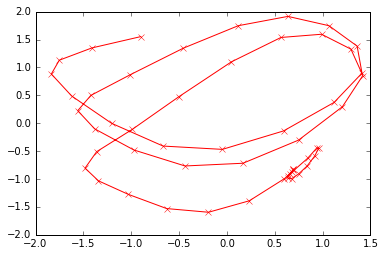

In [4]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')

Here because the data is a time course, we have connected points that are neighbouring in time. This highlights the form of the run, which involves 3 paces. This projects in our low dimensional space to 3 loops. We can examin how much residual variance there is in the system by looking at `sigma2`.

In [5]:
print(sigma2)

0.0239776169795


## Robot Navigation Example

In the next example we will load in data from a robot navigation problem. The data consists of wireless access point strengths as recorded by a robot performing a loop around the University of Washington's Computer Science department in Seattle. The robot records all the wireless access points it can cache and stores their signal strength.

In [6]:
## note: this code does not work

#data = pods.datasets.robot_wireless()
#Y = data['Y']
#Y.shape

There are 215 observations of 30 different access points. In this case the model is suggesting that the access point signal strength should be linearly dependent on the location in the map. In other words we are expecting the access point strength for the $j$th access point at robot position $x_{i, :}$ to be represented by $y_{i, j} = \mathbf{w}_{j, :}^\top \mathbf{x}_{i, :} +  \epsilon_{i,j}$.


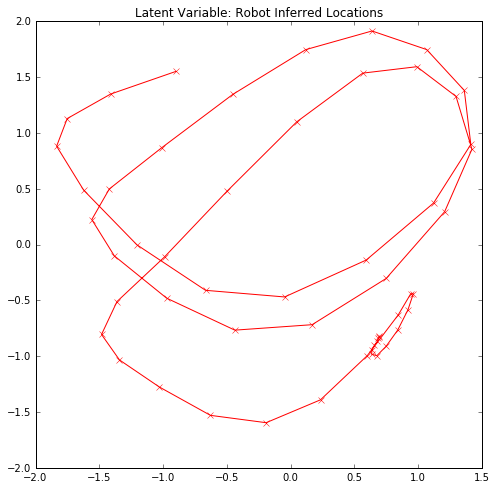

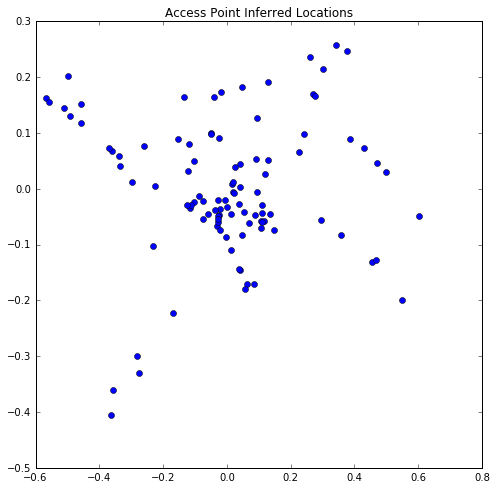

In [7]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')
ax.set_title('Latent Variable: Robot Inferred Locations')
fig, ax = plt.subplots(figsize=(8,8))
W = U*ell[None, :]
ax.plot(W[:, 0], W[:, 1], 'bo')
ax.set_title('Access Point Inferred Locations')

In [8]:
U, ell, sigma2 = ppca(Y.T, q)

## Relationship to Matrix Factorization

We can use the robot naviation example to realise that PCA (and factor analysis) are very reminiscient of the *matrix factorization* example that we used for introducing objective functions. In that system we used slightly different notation, $\mathbf{u}_{i, :}$ for *user* location in our metaphorical library and $\mathbf{v}_{j, :}$ for *item* location in our metaphorical library. To see how these systems are somewhat analagous, now let us think about the user as the robot and the items as the wifi access points. We can plot the relative location of both. This process is known as "SLAM": simultaneous *localisation* and *mapping*. A latent variable model of the type we have developed is one way of performing SLAM. We have an estimate of the *landmarks* in the system (in this case WIFI access points) and we have an estimate of the robot position. These are analagous to the estimate of the user's position and the estimate of the items positions in the library. In the matrix factorisation example users are informing us what items they are 'close' to by expressing their preferences, in the robot localization example the robot is informing us what access point it is close to by measuring signal strength.

From a personal perspective, I find this analogy quite comforting. I think it is very arguable that one of the mechanisms through which we (as humans) may have developed higher reasoning is through the need to navigate around our environment, identifying landmarks and associating them with our search for food. If such a system were to exist, the idea that it could be readily adapted to other domains such as categorising the nature of the different foodstuffs we were able to forage is intriguing. 

From an algorithmic perspective, we also can now realise that matrix factorization and latent variable modelling are effectively the same thing. The only difference is the objective function and our probabilistic (or lack of probabilistic) treatment of the variables. But the prediction functoin for both systems,
$$
f_{i, j} = \mathbf{u}_{i, :}^\top \mathbf{v}_{j, :} 
$$
for matrix factorization or
$$
f_{i, j} = \mathbf{x}_{i, :}^\top \mathbf{w}_{j, :} 
$$
for probabilistic PCA and factor analysis are the same.

## Other Interpretations of PCA: Separating Model and Algorithm

Since Hotelling first introduced his perspective on factor analysis as PCA there has been somewhat of a conflation of the idea of the model underlying PCA (for which it was very clear that Hotelling was inspired by Factor Analysis) and the algorithm that is used to fit that model: the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors of an ellipsoid have been known since the middle of the 19th century as the principal axes of the elipsoid, and they arise through the following additional ideas: seeking the orthogonal directions of *maximum variance* in a dataset. Pearson in 1901 arrived at the same algorithm driven by a desire to seek a *symmetric regression* between two covariate/response variables $x$ and $y$. He is, therefore, often credited with the invention of principal component analysis, but to me this seems disengenous. His aim was very different from Hotellings, it was just happened that the optimal solution for his model was coincident with that of Hotelling. The approach is also known as the [Karhunen Loeve Transform](http://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem)  in stochastic process theory and in classical multidimensional scaling the same operation can be shown to be minimising a particular objective function based on interpoint distances in the data and the latent space (see the section on Classical Multidimensional Scaling in [Mardia, Kent and Bibby](http://store.elsevier.com/Multivariate-Analysis/Kanti-Mardia/isbn-9780124712522/)). One of my own contributions to machine learning was deriving yet another model whose linear variant was solved by finding the principal subspace of the covariance matrix (an approach I termed dual probabilistic PCA or probabilistic principal coordinate analysis). Finally, the approach is sometimes referred to simply as singular value decomposition (SVD). The singular value decomposition of a data set has the following form,
$$
\mathbf{Y} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{U}^\top
$$
where $\mathbf{V}\in\Re^{n\times n}$ and $\mathbf{U}^\in \Re^{p\times p}$ are square orthogonal matrices and $\mathbf{\Lambda}^{n \times p}$ is zero apart from its first $p$ diagonal entries. Singularvalue decomposition gives a diagonalisation of the covariance matrix, because under the SVD we have
$$
\mathbf{Y}^\top\mathbf{Y} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top\mathbf{V} \boldsymbol{\Lambda} \mathbf{U}^\top = \mathbf{U}\boldsymbol{\Lambda}^2 \mathbf{U}^\top
$$
where $\boldsymbol{\Lambda}^2$ is now the eigenvalues of the covariane matrix and $\mathbf{U}$ are the eigenvectors. So performing the SVD can simply be seen as another approach to determining the principal components.

### Separating Model and Algorithm

I've given a fair amount of personal thought to this situation and my own opinion that this confusion about method arises because of a conflation of model and algorithm. The model of Hotelling, that which he termed principal component analysis, was really a variant of factor analysis, and it was unfortunate that he chose to rename it. However, the algorithm he derived was a very convenient way of optimising a (simplified) factor analysis, and it's therefore become very popular. The algorithm is also the optimal solution for many other models of the data, even some which might seem initally to be unrelated (e.g. seeking directions of maximum variance). It is only through the mathematics of this linear system (which also contains some intersting symmetries) that all these ides become related. However, as soon as we choose to non-linearise the system (e.g. through basis functions) we find that each of the non-linear intepretations we can derive for the different models each leads to a very different algorithm (if such an algorithm is possible). For example [principal curves](http://web.stanford.edu/~hastie/Papers/Principal_Curves.pdf) of Hastie and Stuezle attempt to non-linearise the maximum variance interpretation, [kernel PCA](http://en.wikipedia.org/wiki/Kernel_principal_component_analysis) of Schoelkopf, Smola and Mueller uses basis functions to form the eigenvalue problem in a nonlinear space, and my own work in this area [non-linearises the dual probabilistic PCA](http://jmlr.org/papers/volume6/lawrence05a/lawrence05a.pdf). 

My conclusion is that when you are doing machine learning you should always have it clear in your mind what your *model* is and what your *algorithm* is. You can recognise your model because it normally contains a prediction function and an objective function. The algorithm on the other hand is the sequence of steps you implement on the computer to solve for the parameters of this model. For efficient implementation, we often modify our model to allow for faster algorithms, and this is a perfectly valid pragmatist's approach, so conflation of model and algorithm is not always a bad thing. But for clarity of thinking and understanding it is necessary to maintain the separation and to maintain a handle on when and why we perform the conflation.

## PCA in Practice

Principal component analysis is so effective in practice that there has almost developed a mini-industry in renaming the method itself (which is ironic, given its origin). In particular [Latent Semantic Indexing](http://en.wikipedia.org/wiki/Latent_semantic_indexing) in text processing is simply PCA on a particular representation of the term frequencies of the document. There is a particular fad to rename the eigenvectors after the nature of the data you are examining, perhaps initially triggered by [Turk and Pentland's](http://www.face-rec.org/algorithms/PCA/jcn.pdf) paper on eigenfaces, but also with [eigenvoices](https://wiki.inf.ed.ac.uk/twiki/pub/CSTR/ListenSemester1_2007_8/kuhn-junqua-eigenvoice-icslp1998.pdf) and [eigengenes](http://www.biomedcentral.com/1752-0509/1/54). This seems to be an instantiation of a wider, and hopefully subconcious, tendency in academia to attempt to differentiate one idea from the same idea in related fields in order to emphasise the novelty. The unfortunate result is somewhat of a confusing literature for relatively simple model. My recommendations would be as follows. If you have multivariate data, applying some form of principal component would seem to be a very good idea as a first step. Even if you intend to later perform classification or regression on your data, it can give you understanding of the structure of the underlying data and help you to develop your intuitions about the nature of your data. Intelligent plotting and interaction with your data is always a good think, and for high dimensional data that means that you need some way of visualisation, PCA is typically a good starting point.

## Marginal Likelihood

We have developed the posterior density over the latent variables given the data and the parameters, and due to symmetries in the underlying prediction function, it has a very similar form to its sister density, the posterior of the weights given the data from Bayesian regression. Two key differences are as follows. If we were to do a Bayesian multiple output regression we would find that the marginal likelihood of the data is independent across the features and correlated across the data,
$$
p(\mathbf{Y}|\mathbf{X}) = \prod_{j=1}^p \mathcal{N}(\mathbf{y}_{:, j}|\mathbf{0}, \alpha\mathbf{X}\mathbf{X}^\top + \sigma^2 \mathbf{I})
$$
where $\mathbf{y}_{:, j}$ is a column of the data matrix and the independence is across the *features*, in probabilistic PCA the marginal likelihood has the form,
$$
p(\mathbf{Y}|\mathbf{W}) = \prod_{i=1}^n \mathcal{N}(\mathbf{y}_{i, :}|\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I})
$$
where $\mathbf{y}_{i, :}$ is a row of the data matrix $\mathbf{Y}$ and the independence is across the data points.

## Computation of the Log Likelihood

The quality of the model can be assessed using the log likelihood of this Gaussian form.
$$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \log \left| \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I} \right| -\frac{1}{2} \sum_{i=1}^n \mathbf{y}_{i, :}^\top \left(\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)^{-1} \mathbf{y}_{i, :} +\text{const}
$$
but this can be computed more rapidly by exploiting the low rank form of the covariance covariance, $\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}$ and the fact that $\mathbf{W} = \mathbf{U}\mathbf{L}\mathbf{R}^\top$. 

Specifically, we first use the decomposition of $\mathbf{W}$ to write:
$$
-\frac{n}{2} \log \left| \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I} \right| = -\frac{n}{2} \sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log \sigma^2 ,
$$
where $\ell_i$ is the $i$th diagonal element of $\mathbf{L}$. Next, we use the [Woodbury matrix identity](http://en.wikipedia.org/wiki/Woodbury_matrix_identity) which allows us to write the inverse as a quantity which contains another inverse in a smaller matrix:
$$
(\sigma^2 \mathbf{I} + \mathbf{W}\mathbf{W}^\top)^{-1} = \sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W}{\underbrace{(\mathbf{I}+\sigma^{-2}\mathbf{W}^\top\mathbf{W})}_{\mathbf{C}_x}}^{-1}\mathbf{W}^\top
$$
So, it turns out that the original inversion of the $p \times p$ matrix can be done by forming a quantity which contains the inversion of a $q \times q$ matrix which, moreover, turns out to be the quantity $\mathbf{C}_x$ of the posterior.

Now, we put everything together to obtain:
$$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log \sigma^2 - \frac{1}{2} \text{tr} \left( \mathbf{Y}^\top \left( \sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W} \mathbf{C}_x \mathbf{W}^\top \right) \mathbf{Y}  \right) + \text{const}
$$
where we used the fact that a scalar sum can be written as $\sum_{i=1}^n \mathbf{y}_{i,:}^\top \mathbf{K} \mathbf{y}_{i,:} = \text{tr}\left( \mathbf{Y}^\top \mathbf{K} \mathbf{Y} \right)$, for any matrix $\mathbf{K}$ of appropriate dimensions. We now use the properties of the trace $\text{tr}(\mathbf{A}+\mathbf{B})=\text{tr}(\mathbf{A})+\text{tr}(\mathbf{B})$ and $\text{tr}(c \mathbf{A}) = c \text{tr}(\mathbf{A})$, where $c$ is a scalar and $\mathbf{A},\mathbf{B}$ matrices of compatible sizes. Therefore, the final log likelihood takes the form:
$$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log \sigma^2 - \frac{\sigma^{-2}}{2} \text{tr}(\mathbf{Y}^\top \mathbf{Y}) +\frac{\sigma^{-4}}{2} \text{tr}(\mathbf{B}\mathbf{C}_x\mathbf{B}^\top) + \text{const}
$$
where we also defined $\mathbf{B}=\mathbf{Y}^\top\mathbf{W}$.

Finally, notice that $\text{tr}(\mathbf{Y}\mathbf{Y}^\top)=\text{tr}(\mathbf{Y}^\top\mathbf{Y})$ can be computed faster as the sum of all the elements of $\mathbf{Y}\circ\mathbf{Y}$, where $\circ$ denotes the element-wise (or [Hadamard](http://en.wikipedia.org/wiki/Hadamard_product_(matrices)) product.



## Reconstruction of the Data

Given any posterior projection of a data point, we can replot the original data as a function of the input space. 

We will now try to reconstruct the motion capture figure form some different places in the latent plot.

### Assignment Question 5

Project the motion capture data onto its principal components, and then use the *mean posterior estimate* to reconstruct the data from the latent variables at the data points. Use two latent dimensions. What is the sum of squares error for the reconstruction? 

*15 marks*

In [10]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

import numpy as np
import scipy as sp

# Load motion capture data
import pods
data = pods.datasets.osu_run1()
Y = data['Y']

# Use two latent dimensions 
q = 2
U, ell, sigma2 = ppca(Y, q)

# Compute posterior (get mu and cov matrix)
mu_x, C_x = posterior(Y, U, ell, sigma2)

# Reconsutrct the data from the latent variables at the data points
F = np.dot(mu_x, U.T)

Y_cent = Y - Y.mean(0)
sum_squares = ((Y_cent - F)**2).sum()
print("Sum of squares error: ", sum_squares)

Sum of squares error:  254.318968538


## Other Data Sets to Explore

Below there are a few other data sets from `pods` you might want to explore with PCA. Both of them have $p$>$n$ so you need to consider how to do the larger eigenvalue probleme efficiently without large demands on computer memory.


The data is actually quite high dimensional, and solving the eigenvalue problem in the high dimensional space can take some time. At this point we turn to a neat trick, you don't have to solve the full eigenvalue problem in the $p\times p$ covariance, you can choose instead to solve the related eigenvalue problem in the $n \times n$ space, and in this case $n=200$ which is much smaller than $p$.

The original eigenvalue problem has the form
$$
\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}
$$
But if we premultiply by $\mathbf{Y}$ then we can solve,
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{Y}\mathbf{U}\boldsymbol{\Lambda}
$$
but it turns out that we can write
$$
\mathbf{U}^\prime = \mathbf{Y} \mathbf{U} \Lambda^{\frac{1}{2}}
$$
where $\mathbf{U}^\prime$ is an orthorormal matrix because
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \Lambda^{-\frac{1}{2}}\mathbf{U}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
and since $\mathbf{U}$ diagonalises $\mathbf{Y}^\top\mathbf{Y}$, 
$$
\mathbf{U}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \Lambda
$$
then 
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \mathbf{I}
$$


## Olivetti Faces

You too can create your own eigenfaces. In this example we load in the 'Olivetti Face' data set, a small data set of 200 faces from the [Olivetti Research Laboratory](http://en.wikipedia.org/wiki/Olivetti_Research_Laboratory). Below we load in the data and display an image of the second face in the data set (i.e., indexed by 1). 

In [ ]:
data = pods.datasets.olivetti_glasses()
Y = data['X'] # this data set is set up for classification, but we will model the outputs.
lbls = data['Y']
import matplotlib.cm as cm # import color map
display_index = 0
plt.imshow(np.reshape(Y[display_index, :].flatten(), (64, 64)).T, cmap = cm.Greys_r)

Acquiring resource: olivetti_glasses

Details of data: 
Information recorded in olivetti_faces entry. Should be used from there.

Please cite:
Information recorded in olivetti_faces entry. Should be used from there.

After downloading the data will take up 4261047 bytes of space.

Data will be stored in /Users/gmyrianthous/ods_data_cache/olivetti_glasses.

Do you wish to proceed with the download? [yes/no]


Note that to display the face we had to reshape the appropriate row of the data matrix. This is because the images are turned into vectors by stacking columns of the image on top of each other to form a vector. The operation
```python 
im = np.reshape(Y[1, :].flatten(), (64, 64)).T
```
recovers the original image into a matrix `im` by using the `np.reshape` function to return the vector to a matrix.

### Visualizing the Eigenvectors

Each retained eigenvector is stored in the $j$th column of $\mathbf{U}$. Each of these eigenvectors is associated with particular directions of variation in the original data. Principal component analysis implies that we can reconstruct any face by using a weighted sum of these eigenvectors where the weights for each face are given by the relevant vector of the latent variables, $\mathbf{x}_{i, :}$ and the diagonal elements of the matrix $\mathbf{L}$. We can visualize the eigenvectors $\mathbf{U}$ as images by performing the same reshape operation we used to recover the image associated with a data point above. Below we do this for the first nine eigenvectors of the Olivetti Faces data.

In [ ]:
width=3
height=3
q = width*height
fig, ax = plt.subplots(width,height,figsize=(12,12))

U, ell, sigma2 = ppca(Y, q)
lat = 0
for i in range(width):
    for j in range(height):
        ax[i, j].imshow(np.reshape(U[:, lat].flatten(), (64, 64)).T, cmap = cm.Greys_r)
        ax[i, j].set_title('Principle Component ' + str(lat+1))
        lat += 1

### Reconstruction

We can now attempt to reconstruct a given training point from these eigenvectors. As we mentioned above, the reconstruction is dependent on the value of the latent variable and the weights from the matrix $\mathbf{L}$. First let's compute the value of the latent variables for the point we want to construct. Then we'll use them to compute the weightings of each of the eigenvectors.

In [ ]:
mu_x, C_x = posterior(Y, U, ell, sigma2)
reconstruction_weights = mu_x[display_index, :]*ell
print(reconstruction_weights)

This vector of reconstruction weights is applied to the 'template images' given by the eigenvectors to give us our reconstruction. Below we weight these templates and combine to form the reconstructed image, and show the comparison to the original image.

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12,6))
ax[0].imshow(np.reshape(Y[display_index, :].flatten(), (64, 64)).T, cmap = cm.Greys_r)
ax[0].set_title('Original Example no ' + str(display_index))
ax[1].imshow(np.reshape(np.dot(U,reconstruction_weights) + Y.mean(axis=0)[None, :], (64, 64)).T, cmap = cm.Greys_r)
ax[1].set_title('Reconstruction of Example from ' + str(len(reconstruction_weights)) + ' Latent Variables')

The quality of the reconstruction is a bit blurry, it can be improved by increasing the number of template images used (i.e. increasing the *latent dimensionality*). 

## Gene Expression

Each of the cells in your body stores your entire genetic code in your DNA, but at any one moment it is only 'expressing' a small portion of that code. Your cells are mainly constructed of protein, and these proteins are manufactured by first transcribing the DNA to RNA and then translating the RNA to protein. If the DNA is the cells hard drive, then one role of the RNA is to act like a cache of data that is being read from the hard drive at any one time. Gene expression arrays allow us to measure the quantity of different types of RNA in the cell, effectively analyzing what's in the cache (although we have to destroy the cell or the tissue to access it). A gene expression experiment often consists of a time course or a series of experiments that characterise the gene expression of cells at any given time.

We will now load in one of the earliest gene expression data sets from a [1998 paper by Spellman et al.](http://www.ncbi.nlm.nih.gov/pubmed/9843569), it consists of gene expression measurements of over six thousand genes in a range of conditions for brewer's yeast. The experiment was designed for understanding the cell cycle of the genes. The expectation is that there should be oscillating signals inside the cell.

First we extract the principale components of the gene expression.

In [ ]:
# load in data and replace missing values with zero
data=pods.datasets.spellman_yeast_cdc15()
Y = data['Y'].fillna(0)
q = 5
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

Now, looking through, we find that there is indeed a latent variable that appears to oscilate at approximately the right frequency. The 4th latent dimension (`index=3`) can be plotted across the time course as follows.

In [ ]:
plt.plot(mu_x[:, 3])

To reveal an oscillating shape. We can see which genes correspond to this shape by examining the associated column of $\mathbf{U}$. Let's augment our data matrix with this score.

In [ ]:
gene_list = Y.T
gene_list['oscilation'] = np.sqrt(U[:, 3]**2)
gene_list.sort(columns='oscilation', ascending=False).index[:4]

We can look up the first three genes in this list which now ranks the genes according to how strongly they respond to the fourth latent dimension. [The NCBI gene database](http://www.ncbi.nlm.nih.gov/gene/) allows us to search for the function of these genes. Looking at the function of the four genes that respond most strongly to the third latent variable they are all genes that encode [histone](http://en.wikipedia.org/wiki/Histone) proteins. The histone is the support scaffold for the DNA that ensures it folds correctly within the cell creating the nucleosomes. It seems to make sense that production of histone proteins should be strongly correlated with the cell cycle, as when the cell divides it needs to create a large number of histone proteins for creating the duplicated nucleosomes. The relevant links giving the descriptions of each gene given here: [YDR224C](http://www.ncbi.nlm.nih.gov/gene/851810), [YDR225W](http://www.ncbi.nlm.nih.gov/gene/851811), [YBL003C](http://www.ncbi.nlm.nih.gov/gene/852283) and [YNL030W](http://www.ncbi.nlm.nih.gov/gene/855701).